# Tema 4. Aspectos Avanzados de la Optimización  

### En esta clase ejercitaremos los conocimientos relacionados con la definición y solución de problemas multi-objetivos, los algoritmos híbridos y los métodos utilizados para evaluar algoritmos de optimización. La práctica persigue afianzar el dominio de los conceptos fundamentales en estos temas y desarrollar las habilidades para resolver estos problemas utilizando técnicas de programación.

In [6]:
# Comenzamos importando las librerías de python que serán utilizadas para desarrollar los ejercicios,
# lecturas de ficheros, imágenes, etcétera.
%matplotlib inline


import numpy as np
import pylab as pl
import matplotlib.cm as cm
import matplotlib
#import pandas as pd 
import random
import math
from PIL import Image as im
#import cv2

from IPython.display import display
from IPython.display import Image



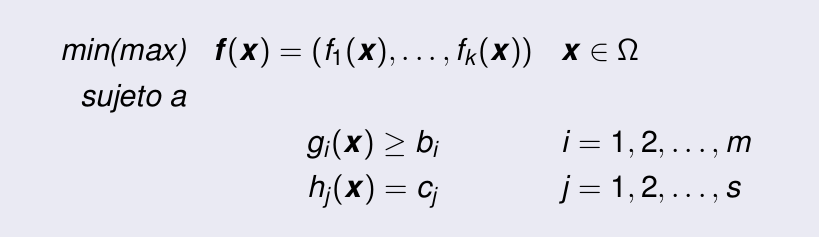

In [7]:
# Cargamos una imagen que describe una definición de un problema de optimización multi-objetivo
 
i = Image(filename='images/ProblemaMOP.png')
i

In [8]:
# A partir de la definición anterior, determine para  cuáles de los siguientes problemas 
# tiene sentido una formulación como problemas de optimización multi-objetivo


# 1) En las finanzas, un problema común es elegir una cartera de inversiones con dos objetivos en conflicto: 
#    a)  maximizar la rentabilidad de la cartera . b) minimizar el riesgo
# 2) Diseñar un prototipo de coche automotor que satisfaga los siguientes requisitos: a) Minimizar consumo de combustible.
#    b) Maximizar condiciones de seguridad. c) Minimizar emisiones CO2. d) Minimizar costo de producción. e) Minimizar 
#    tiempo de ensamblaje.
# 3) Encontrar las soluciones de valor mínimo de la función g(x) que sastisfagan que h(x)<6.
# 4) Encontrar el vector x=(x_1,...,x_n) donde x_i={0,1} y que maximice las siguientes funciones: f1(x)=x, f2(x^2), f3(x^4)
# 5) Encontrar una permutación, representando una posible ordenación entre n ciudades que: 1) Minimice la distancia a recorrer. 
#    2) La ciudad de llegada sea siempre la misma. 3) La ciudad de comienzo del recorrido sea siempre la misma
# 6)  Encontrar una permutación, representando una posible ordenación entre n ciudades que: 1) Minimice el costo de combustible
#   a utilizar para visitar las ciudades. 2) Minimice el tiempo de recorrido.



%run ProblemasMOP.py  1 2 6 



Todas las respuestas escogidas son correctas y no falta ninguna.


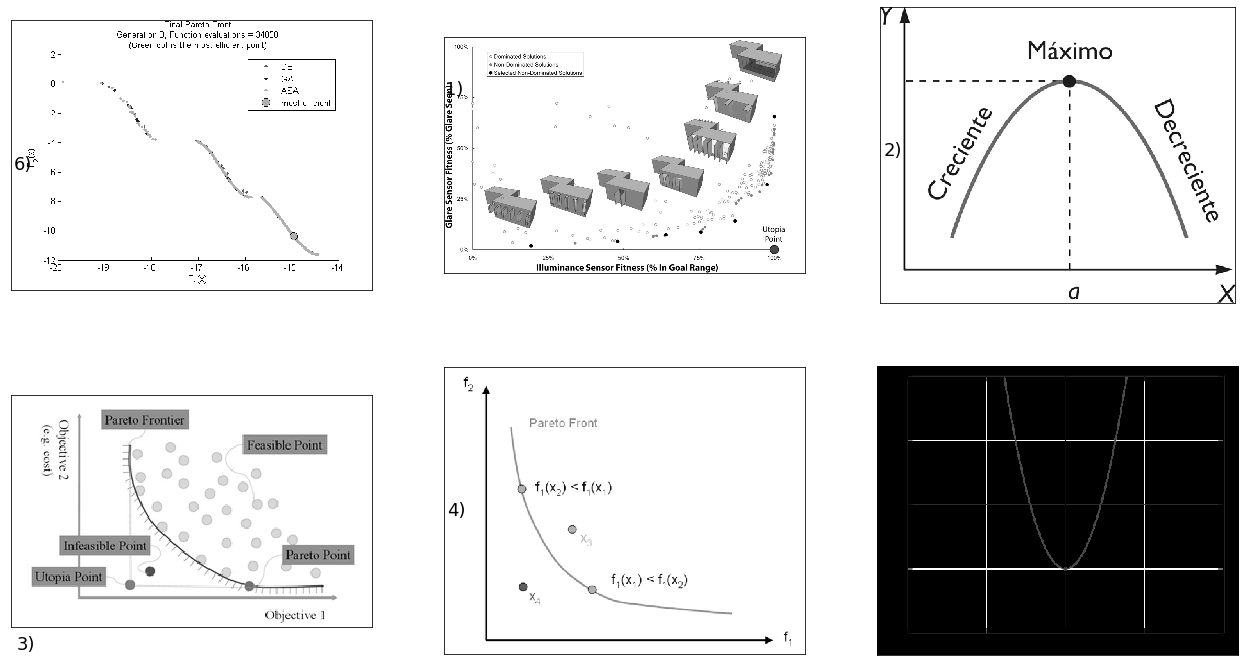

In [9]:
# Importamos varias imágenes representando diferentes conceptos 

matplotlib.rcParams['figure.figsize'] = (22,12)
f = pl.figure()
for n, fname in enumerate(('images/mop1.png', 'images/mop2.png','images/mop3.png','images/mop4.png','images/mop5.jpg','images/mop6.png')):
    image=im.open(fname).convert("L")    
    arr=np.asarray(image)
    f.add_subplot(2, 3, n+1)  # this line outputs images side-by-side 
    fig=pl.imshow(arr,cmap=cm.Greys_r)
    ttitle = str(np.mod(n+5,6)+1)+')'
    pl.text(5,232,ttitle,size=18)    
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False) 
    

In [13]:
# A partir del análisis de las imágenes anteriores
# Seleccione cuáles describen conceptos relacionados con la optimización multi-objectivo

## Introduzca su respuesta como en el siguiente ejemplo     
## donde cada número se corresponde con una posible respuesta correcta


%run ConceptosMOP.py 3 4 

Todas las respuestas escogidas son correctas y no falta ninguna.


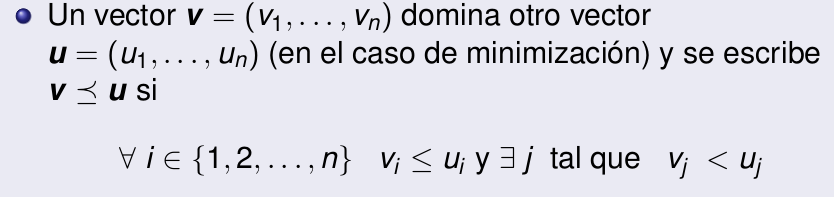

In [14]:
# Cargamos una imagen que describe la definición del concepto de dominancia
 
i = Image(filename='images/Dominancia.png')
i

In [18]:
# A partir de la definición anterior determine en cuáles de los siguientes ejemplos
# de pares de soluciones (v) y (u), se cumple que el vector v domina al vector u
# En cada caso se especifica al inicio cuál es el tipo de problema de optimización 
# representado cada componente.
# Ejemplo 1:
# (max,max,max) v = (19.0,1.0,-10.0) y u=(10.0,0.5,-15). 
# En este caso los tres problemas son de maximización y v domina a u.
# Ejemplo 2:
# (min,max,max,min) v = (-100,0.01,11.0,-10.0) y u=(-10.0,99.0,15.5,-15)
# En este caso el primer y el último problema son de minimización y el segundo y el tercero
# de maximización. v no domina u porque, exceptuando el primer problema, donde v(1)<u(1), en
# el resto de los problemas u supera a v, es decir u(2)>v(2), u(3)>v(3), y u(4)<v(4)

# En cuáles de los siguientes ejemplos v domina a u ?

# 1) (min,max,min) v=(0.1,0.3,0.05) y u=(0.2,0.1,0.06)
# 2) (max,max,max) v=(0.3,1.5,100) y u=(0.5,1.7,200)
# 3) (min,min,max,max) v=(770.5,341.5,-100,-10^5) y u=(800.5,1.7,-99,0)
# 4) (max,min,max,min,max) v=(103,1.5,100,45,98) y u=(103,1.5,100,46,98)
# 5) (max,max,max,min,max) v=(-0.01,-66,-0.88,45,98) y u=(-9,-103,1.5,54,98)
# 6) (min,min,min,min,max) v=(20001,39,39,39,9008) y u=(10^5,39,39,39,0)
# 7) (max,max) v=(0,1) y u=(1,0)
# 8) (min,min,min) v=(6,5,4) y u=(6,5,3)

%run Dominancia.py 1 4 6


Todas las respuestas escogidas son correctas y no falta ninguna.


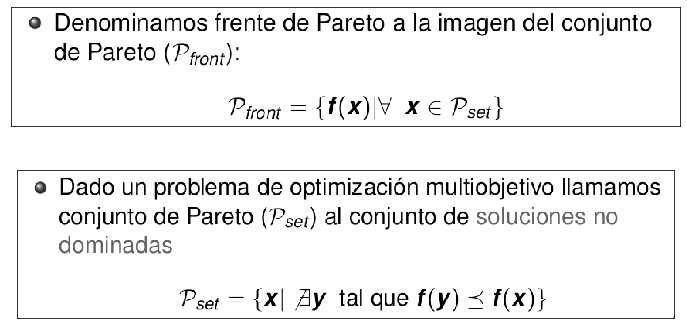

In [19]:
# Cargamos dos imágenes que describen los conceptos de conjunto de Pareto y frente de Pareto
 
matplotlib.rcParams['figure.figsize'] = (12,6)
f = pl.figure()
for n, fname in enumerate(('images/ParetoFront.png','images/ParetoSet.png')):
    image=im.open(fname).convert("L")    
    arr=np.asarray(image)
    f.add_subplot(2, 1, n+1)  # this line outputs images side-by-side 
    fig=pl.imshow(arr,cmap=cm.Greys_r)    
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False) 
    

In [22]:
# Utilizando las definiciones anteriores determine cuáles de los  
# siguientes vectores de tipo f(x) = (f_1(x),f_2(x),f_3(x),f_4(x),f_5(x))
# para  un problema (max,max,max,max,max) forman parte del conjunto Pareto


# 1) (0.3,0.6,0.8,1.0,3.0)
# 2) (0.4,0.2,1.0,5.0,18.0)
# 3) (0.7,0.1,1.0,5.0,20.0)
# 4) (0.3,0.6,10.0,1.0,40.0)
# 5) (0.7,0.8,12.0,15.0,0.5)
# 6) (20.0,-1.0,37.0,-0.5,0.5)
# 7) (0.1,-2.5,0.5,-3.7,0.1)
# 8) (0.4,-2.5,3.0,12.0,21.0)

%run MiembrosParetoSet.py 1 2 3 4 5 6 8


Todas las respuestas escogidas son correctas y no falta ninguna.


In [24]:
# En el siguiente ejemplo adaptaremos un algoritmo genético simple para tratar con un
# problema sencillo de dos objetivos totalmente contrapuestos 

#  Se define la función bi-objetivo BiMax que por un lado busca soluciones que minimicen el número
#  de unos y por otro lado que maximicen este número. Todas las soluciones de este problema son no
#  dominadas

def BiMax(individual):  
    return  (-sum(individual)),sum(individual)


gen	nevals	avg                        	std                	min        	max        
0  	150   	[-25.63333333  25.63333333]	[3.758398 3.758398]	[-36.  17.]	[-17.  36.]
1  	101   	[-25.6  25.6]              	[3.7255872 3.7255872]	[-36.  16.]	[-16.  36.]
2  	81    	[-25.58666667  25.58666667]	[3.75799001 3.75799001]	[-36.  16.]	[-16.  36.]
3  	93    	[-25.65333333  25.65333333]	[3.74875387 3.74875387]	[-35.  14.]	[-14.  35.]
4  	95    	[-25.61333333  25.61333333]	[3.87261611 3.87261611]	[-35.  15.]	[-15.  35.]
5  	92    	[-25.59333333  25.59333333]	[4.01513249 4.01513249]	[-35.  14.]	[-14.  35.]
6  	95    	[-25.52  25.52]            	[4.26570823 4.26570823]	[-36.  14.]	[-14.  36.]
7  	104   	[-25.58666667  25.58666667]	[4.2476451 4.2476451]  	[-35.  16.]	[-16.  35.]
8  	97    	[-25.52666667  25.52666667]	[4.39650872 4.39650872]	[-39.  16.]	[-16.  39.]
9  	98    	[-25.58  25.58]            	[4.45461558 4.45461558]	[-40.  15.]	[-15.  40.]
10 	94    	[-25.58  25.58]            	[4.42006033 4.

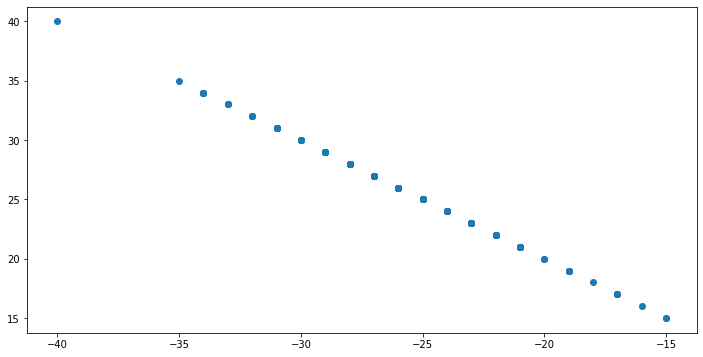

In [25]:
# El siguiente código implementa la aplicación de un algoritmo genético simple al problema
# de maximizar la función BiMax
# Para la implementación se utiliza la librería DEAP (Distributed Evolutionary Algorithms in Python)
# http://code.google.com/p/deap/
# http://deap.gel.ulaval.ca/doc/default/examples/

# Lea con detenimiento cada una de las instrucciones de código y ejecútelo
# Observe cuáles son los valores máximo, medio, y mínimo de la fitness en cada generación
# Para los dos objetivos utilizados

# Nótese que se utiliza un operador de selección basado en el algoritmo NSGA, que ordena
# las soluciones teniendo en cuenta el conjunto Pareto


# Se importan las estructuras de datos
import random
from deap import algorithms, base, creator, tools

# Se crea una clase FitnessMax para la maximización de las dos funciones
creator.create("FitnessMax", base.Fitness, weights=(1.0,1.0))
# Se crea una clase individuo asociada a la clase FitnessMax
creator.create("Individual", list, fitness=creator.FitnessMax)
   

# Heredamos las clases y funciones implementadas como parte de DEAP
toolbox = base.Toolbox()
# Utilizaremos una representación binaria
toolbox.register("attr_bool", random.randint, 0, 1)
# Definimos que nuestros individuos tendrán 50 variables binarias
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=50)
# Definimos la población a partir de los individuos
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
# Asociamos como función de aptitud la función OneMax
toolbox.register("evaluate", BiMax)
# Nuestro operador de cruzamiento será el cruzamiento en 2 puntos
toolbox.register("mate", tools.cxTwoPoint)
# El operador de mutación cambiará 1-->0  y 0-->1 con una probabilidad de mutación de 0.05
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
# Usaremos selección por torneo con un parámetro de torneo = 3
#toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("select", tools.selNSGA2)
n_pop = 150


if __name__ == "__main__":
    # La población tendrá 150 individuos
    logbook = tools.Logbook()
    logbook.header = "gen", "evals", "min", "avg", "max", "fits"
    pop = toolbox.population(n=n_pop)
    # El algoritmo evolutivo simple utiliza los siguientes parámetros
    # Probabilidad de cruzamiento 0.5
    # Probabilidad de aplicar el operador de mutación 0.2
    # Número de generaciones 10
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean, axis=0)
    stats.register("std", np.std, axis=0)
    stats.register("min", np.min, axis=0)
    stats.register("max", np.max, axis=0)
    #stats.register("fits", np.copy)
    pop, logbook = algorithms.eaSimple(pop, toolbox, stats=stats,cxpb=0.5, mutpb=0.2, ngen=10, verbose=True)      
    
      
    # Se muestra el valor de los objetivos en la última población    
    X = np.zeros((n_pop))
    Y = np.zeros((n_pop))
    for i in range(n_pop):
      X[i], Y[i] = pop[i].fitness.values
    pl.plot(X,Y,linestyle='None',marker='o')
    pl.show()
 

In [ ]:
# Utilizando el ejemplo anterior modifique el siguiente script
# para optimizar un problema de tres objetivos, definido en un espacio
# con codificación ternaria (x_i \in {0,1,2})
# y en el que la función objetivo i sea la suma de elementos del vector con
# valor (i-1)
# Ejemplo: Para x=(2,1,1,1,0,0), f(x) = (2,3,1)

# SUGERENCIAS:
# Comience por modificar la definición de la fitness para adecuarla al número  de objetivos
# Modifique la manera en que se genera la primera población para generar soluciones en el espacio ternario
# Defina una nueva función objetivo utilizando como ejemplo la función BiMax
# Utilice el operador de mutación: deap.tools.mutUniformInt(individual, low, up, indpb): # Mutates an individual by 
# replacing attributes, with probability indpb, by a integer uniformly drawn between low and up inclusively.
# Modifique la visualización del frente de Pareto (Posiblemente sean necesarios dos gráficos)


# Se importan las estructuras de datos
import random
from deap import algorithms, base, creator, tools

# Se crea una clase FitnessMax para la maximización de las dos funciones
creator.create("FitnessMax", base.Fitness, weights=(1.0,1.0))
# Se crea una clase individuo asociada a la clase FitnessMax
creator.create("Individual", list, fitness=creator.FitnessMax)
   

# Heredamos las clases y funciones implementadas como parte de DEAP
toolbox = base.Toolbox()
# Utilizaremos una representación binaria
toolbox.register("attr_bool", random.randint, 0, 1)
# Definimos que nuestros individuos tendrán 50 variables binarias
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=50)
# Definimos la población a partir de los individuos
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
# Asociamos como función de aptitud la función OneMax
toolbox.register("evaluate", BiMax)
# Nuestro operador de cruzamiento será el cruzamiento en 2 puntos
toolbox.register("mate", tools.cxTwoPoint)
# El operador de mutación cambiará 1-->0  y 0-->1 con una probabilidad de mutación de 0.05
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
# Usaremos selección por torneo con un parámetro de torneo = 3
#toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("select", tools.selNSGA2)
n_pop = 150


if __name__ == "__main__":
    # La población tendrá 150 individuos
    logbook = tools.Logbook()
    logbook.header = "gen", "evals", "min", "avg", "max", "fits"
    pop = toolbox.population(n=n_pop)
    # El algoritmo evolutivo simple utiliza los siguientes parámetros
    # Probabilidad de cruzamiento 0.5
    # Probabilidad de aplicar el operador de mutación 0.2
    # Número de generaciones 10
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean, axis=0)
    stats.register("std", np.std, axis=0)
    stats.register("min", np.min, axis=0)
    stats.register("max", np.max, axis=0)
    #stats.register("fits", np.copy)
    pop, logbook = algorithms.eaSimple(pop, toolbox, stats=stats,cxpb=0.5, mutpb=0.2, ngen=10, verbose=True)      
    
      
    # Se muestra el valor de los objetivos en la última población    
    X = np.zeros((n_pop))
    Y = np.zeros((n_pop))
    for i in range(n_pop):
      X[i], Y[i] = pop[i].fitness.values
    pl.plot(X,Y,linestyle='None',marker='o')
    pl.show()

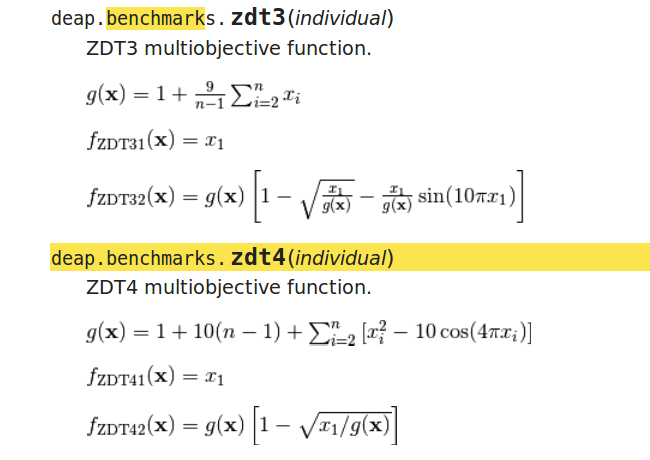

In [26]:
# Cargamos las definiciones de dos problemas bi-objetivos 
# tal y como aparecen incluidos en el Software Deap
# Nótese que ambos problemas están definidos en un vector n=10 variables
# y que el primero de los objetivos depende exclusivamente de la primera variable
 
i = Image(filename='images/ZDT-Functions.png')
i

In [ ]:
# El siguiente programa optimiza el problema multi-objetivo zdt4
# Utilizando una población de 300 soluciones y 20 generaciones 
# Al final de la evolución se muestra el valor de los objetivos de las soluciones
# en la última población así como el frente de Pareto (en rojo)
# Analice las diferentes componentes del programa y ejecútelo variando el tamaño
# de población
# SUGERENCIA: A la hora de modificar el program tenga en cuenta la forma en que se define la función,
# su dimensión, así como el rango de valores de cada variable
# Después de ejecutar el script modificado compare el frente de Pareto obtenido para las funciones
# zdt3 y zdt4 

import array
import random
import numpy
from math import sqrt
from deap import algorithms
from deap import base
from deap import benchmarks
from deap.benchmarks.tools import diversity, convergence
from deap import creator
from deap import tools
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))
creator.create("Individual", array.array, typecode='d', fitness=creator.FitnessMin)
toolbox = base.Toolbox()

# Problem definition
# Functions zdt1, zdt2, zdt3, zdt6 have bounds [0, 1]
#BOUND_LOW, BOUND_UP = 0.0, 1.0
# Functions zdt4 has bounds x1 = [0, 1], xn = [-5, 5], with n = 2, ..., 10
BOUND_LOW, BOUND_UP = [0.0] + [-5.0]*9, [1.0] + [5.0]*9
# Functions zdt1, zdt2, zdt3 have 30 dimensions, zdt4 and zdt6 have 10
NDIM = 10
def uniform(low, up, size=None):
    try:
       return [random.uniform(a, b) for a, b in zip(low, up)]
    except TypeError:
       return [random.uniform(a, b) for a, b in zip([low] * size, [up] * size)]

toolbox.register("attr_float", uniform, BOUND_LOW, BOUND_UP, NDIM)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.attr_float)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", benchmarks.zdt4)
toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=BOUND_LOW, up=BOUND_UP, eta=20.0)
toolbox.register("mutate", tools.mutPolynomialBounded, low=BOUND_LOW, up=BOUND_UP, eta=20.0, indpb=1.0/NDIM)
toolbox.register("select", tools.selNSGA2)

def main(seed=None):
   random.seed(seed)
   NGEN = 20
   MU = 300
   CXPB = 0.9
   stats = tools.Statistics(lambda ind: ind.fitness.values)
   stats.register("avg", np.mean, axis=0)
   stats.register("std", np.std, axis=0)
   stats.register("min", np.min, axis=0)
   stats.register("max", np.max, axis=0)
   stats.register("fits", np.copy)
    
    
   logbook = tools.Logbook()
   logbook.header = "gen", "evals", "min", "avg", "max"
   pop = toolbox.population(n=MU)
   # Evaluate the individuals with an invalid fitness
   invalid_ind = [ind for ind in pop if not ind.fitness.valid]
   fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
   for ind, fit in zip(invalid_ind, fitnesses):
       ind.fitness.values = fit
   # This is just to assign the crowding distance to the individuals
   # no actual selection is done
   pop = toolbox.select(pop, len(pop))
   record = stats.compile(pop)
   logbook.record(gen=0, evals=len(invalid_ind), **record)
   print(logbook.stream)

   # Begin the generational process
   for gen in range(1, NGEN):
    # Vary the population
    offspring = tools.selTournamentDCD(pop, len(pop))
    offspring = [toolbox.clone(ind) for ind in offspring]
    for ind1, ind2 in zip(offspring[::2], offspring[1::2]):
      if random.random() <= CXPB:
         toolbox.mate(ind1, ind2)
      toolbox.mutate(ind1)
      toolbox.mutate(ind2)
      del ind1.fitness.values, ind2.fitness.values
            
    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
      ind.fitness.values = fit
        
    # Select the next generation population
    pop = toolbox.select(pop + offspring, MU)
    record = stats.compile(pop)
    logbook.record(gen=gen, evals=len(invalid_ind), **record)
    print(logbook.stream)
   
   return pop, logbook


if __name__ == "__main__":
    
   pop, logbook = main()
    
   # Se guarda el valor de los objetivos en la última población   
   n_pop = MU = 300
   X = np.zeros((n_pop))
   Y = np.zeros((n_pop))
   for i in range(n_pop):
     X[i], Y[i] = pop[i].fitness.values       
   pl.plot(X,Y,linestyle='None',marker='o')
   
   # Se calcula el conjunto Pareto en la última población     
   ParetoSet = tools.sortNondominated(pop, n_pop, first_front_only=True)
   n_ParetoSet = len(ParetoSet[0]) 
        

   # Se muestra el frente de Pareto     
   Xp = np.zeros((n_ParetoSet))
   Yp = np.zeros((n_ParetoSet))
   for i in range(n_ParetoSet):
     Xp[i], Yp[i] = ParetoSet[0][i].fitness.values       
   pl.plot(Xp,Yp,color='r',linestyle='None',marker='o')     
                
   pl.show()

In [ ]:
# A partir del ejemplo anterior modifique el siguiente script para optimizar 
# la función multi-objetivo zdt3
# Tenga en cuenta la dimensión de esta función así como el rango de valores
# de cada variable

import array
import random
import numpy
from math import sqrt
from deap import algorithms
from deap import base
from deap import benchmarks
from deap.benchmarks.tools import diversity, convergence
from deap import creator
from deap import tools
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))
creator.create("Individual", array.array, typecode='d', fitness=creator.FitnessMin)
toolbox = base.Toolbox()

# Problem definition
# Functions zdt1, zdt2, zdt3, zdt6 have bounds [0, 1]
# BOUND_LOW, BOUND_UP = 0.0, 1.0
# Functions zdt4 has bounds x1 = [0, 1], xn = [-5, 5], with n = 2, ..., 10
BOUND_LOW, BOUND_UP = [0.0] + [-5.0]*9, [1.0] + [5.0]*9
# Functions zdt1, zdt2, zdt3 have 30 dimensions, zdt4 and zdt6 have 10
NDIM = 10
def uniform(low, up, size=None):
    try:
       return [random.uniform(a, b) for a, b in zip(low, up)]
    except TypeError:
       return [random.uniform(a, b) for a, b in zip([low] * size, [up] * size)]

toolbox.register("attr_float", uniform, BOUND_LOW, BOUND_UP, NDIM)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.attr_float)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", benchmarks.zdt4)
toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=BOUND_LOW, up=BOUND_UP, eta=20.0)
toolbox.register("mutate", tools.mutPolynomialBounded, low=BOUND_LOW, up=BOUND_UP, eta=20.0, indpb=1.0/NDIM)
toolbox.register("select", tools.selNSGA2)

def main(seed=None):
   random.seed(seed)
   NGEN = 20
   MU = 300
   CXPB = 0.9
   stats = tools.Statistics(lambda ind: ind.fitness.values)
   stats.register("avg", np.mean, axis=0)
   stats.register("std", np.std, axis=0)
   stats.register("min", np.min, axis=0)
   stats.register("max", np.max, axis=0)
   stats.register("fits", np.copy)
    
    
   logbook = tools.Logbook()
   logbook.header = "gen", "evals", "min", "avg", "max"
   pop = toolbox.population(n=MU)
   # Evaluate the individuals with an invalid fitness
   invalid_ind = [ind for ind in pop if not ind.fitness.valid]
   fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
   for ind, fit in zip(invalid_ind, fitnesses):
       ind.fitness.values = fit
   # This is just to assign the crowding distance to the individuals
   # no actual selection is done
   pop = toolbox.select(pop, len(pop))
   record = stats.compile(pop)
   logbook.record(gen=0, evals=len(invalid_ind), **record)
   print(logbook.stream)

   # Begin the generational process
   for gen in range(1, NGEN):
    # Vary the population
    offspring = tools.selTournamentDCD(pop, len(pop))
    offspring = [toolbox.clone(ind) for ind in offspring]
    for ind1, ind2 in zip(offspring[::2], offspring[1::2]):
      if random.random() <= CXPB:
         toolbox.mate(ind1, ind2)
      toolbox.mutate(ind1)
      toolbox.mutate(ind2)
      del ind1.fitness.values, ind2.fitness.values
            
    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
      ind.fitness.values = fit
        
    # Select the next generation population
    pop = toolbox.select(pop + offspring, MU)
    record = stats.compile(pop)
    logbook.record(gen=gen, evals=len(invalid_ind), **record)
    print(logbook.stream)
   
   return pop, logbook


if __name__ == "__main__":
    
   pop, logbook = main()
    
   # Se guarda el valor de los objetivos en la última población   
   n_pop = MU = 250
   X = np.zeros((n_pop))
   Y = np.zeros((n_pop))
   for i in range(n_pop):
     X[i], Y[i] = pop[i].fitness.values       
   pl.plot(X,Y,linestyle='None',marker='o')
   
   # Se calcula el conjunto Pareto en la última población     
   ParetoSet = tools.sortNondominated(pop, n_pop, first_front_only=True)
   n_ParetoSet = len(ParetoSet[0]) 
        

   # Se muestra el frente de Pareto     
   Xp = np.zeros((n_ParetoSet))
   Yp = np.zeros((n_ParetoSet))
   for i in range(n_ParetoSet):
     Xp[i], Yp[i] = ParetoSet[0][i].fitness.values       
   pl.plot(Xp,Yp,color='r',linestyle='None',marker='o')     
        
        
   pl.show()
 

In [ ]:
# A continuación utilizaremos la búsqueda multi-objetivo combinada con un algoritmo de búsqueda local
# como un ejemplo típico de algoritmos híbridos
# Utilizaremos el problema de la bi-partición de un grafo estudiado en clases anteriores, así como la búsqueda
# local definida para este problema

# PRIMERAMENTE CARGAMOS LAS FUNCIONES QUE PERMITEN LEER LAS INSTANCIAS DEL PROBLEMA
# La función Eval_Bipart_instance permite conocer cuál es el valor de una solución del problema de partición del grafo
# La función Local_Search_Swap_Bipartitioning  realiza una búsqueda  local para el problema de la partición del grafo
# explorando exhaustivamente la vecindad de cada punto y comenzando por una solución aleatoria


def Read_Bipart_Instance(fname):    # Permite leer instancias del problema de la partición de un grafo
 hdl = open(fname, 'r')           
 mylist = hdl.readlines()
 hdl.close()
 n = eval(mylist[0])      
 edge_weights = np.zeros((n,n))      # Pesos de las aristas 
 for i in range(n):
   for j,val in enumerate(mylist[i+1].split()):     
     edge_weights[i,j]=eval(val)         
 return edge_weights


def Eval_Bipart_instance(edge_weights,solution):  # Permite evaluar soluciones del problema de la partición de un grafo
 n = edge_weights.shape[0]         # Número de nodos
 balance =  np.sum(solution) # Numero de nodos en una de las partes
 fval = 0                  # Peso de las aristas entre partes del grafo
 for i in range(n-1):
     for j in range(i+1,n):
       if solution[i]==1-solution[j]:      # Si estan en partes diferentes  
          fval = fval+edge_weights[i,j]
 feasible=(balance==n/2)
 return feasible,fval,balance
        
        
       
def SwapObjectsNeighborhood(sol):
    n = sol.shape[0]    
    n_neighbors = (n-np.sum(sol))*(np.sum(sol))           # Número de vecinos (Todos los objetos que pueden ser añadidos)
    neighbors = np.zeros((n_neighbors,n), dtype=int)      # Guardaremos todos los vecinos en neighbors 
    absent_objects = np.where(sol==0)[0]                  # Posiciones donde se puede añadir un objeto 
    present_objects = np.where(sol==1)[0]
    ind = 0
    for i in range(absent_objects.shape[0]):      
      for j in range(present_objects.shape[0]):        
       neighbors[ind,:] = sol.copy() 
       neighbors[ind,absent_objects[i]] = 1              
       neighbors[ind,present_objects[j]] = 0     
       ind = ind + 1     
    return neighbors
 
        
 
def Local_Search_Swap_Bipartitioning(edge_weights):    # Implementa una búsqueda local para el problema de la partición del grafo
 n = edge_weights.shape[0] 
 aux_perm = np.random.permutation(n)   # Se genera una solución aleatoria factible 
 print(aux_perm)
 init_sol =  np.zeros((n), dtype=int)             # en la cual la partición del grafo está balanceada 
 init_sol[aux_perm[0:n//2]] = 1                  
 feasible,fval,balance = Eval_Bipart_instance(edge_weights,init_sol)    
 best_val = fval                                                     # Mejor valor
 best_sol = init_sol                                                  # Mejor solución  
 improvement = True
 number_evaluations = 1   
 while improvement:                    # Mientras se mejore el valor de la función
    neighbors = SwapObjectsNeighborhood(best_sol)            # Todos los vecinos    
    n_neighbors = neighbors.shape[0]
    number_evaluations =  number_evaluations + n_neighbors  # Se calcula es número de evaluaciones
    best_val_among_neighbors = best_val
    for i in range(n_neighbors):                    # Se recorren todos los vecinos buscando el mejor 
      sol = neighbors[i,:]   
      feasible,fval,balance = Eval_Bipart_instance(edge_weights,sol) # Eval_Knapsack_instance(capacity,weights,profits,sol)     # Se evalua la función     
      #print(feasible,fval,fweight)
      if (fval<best_val_among_neighbors):             # Si es mejor que el mejor valor entre los vecinos hasta el momento
        best_val_among_neighbors = fval               # se actualiza el mejor valor
        best_sol_among_neighbors = sol   
    improvement = (best_val_among_neighbors<best_val) #  Se determina si ha habido mejora con respecto al ciclo anterior  
    if improvement:                                
      best_val = best_val_among_neighbors           # Se actualiza el mejor valor y la mejor solución 
      best_sol = best_sol_among_neighbors      
      print(best_val,best_sol, number_evaluations)  
 return   best_val,best_sol,number_evaluations     
 

In [ ]:
# Leemos dos matrices de pesos de diferentes asociadas con el mismo grafo
# Pueden ser interpretadas como maneras diferentes de medir el costo asociado a
# la partición del grafo 
# El problema multi-objetivo consiste en encontrar una partición que minimice el
# costo de los dos criterios
# Ejecute el script. Compruebe como las soluciones obtenidas por el algoritmo
# de búsqueda local son diferentes para cada una de las matrices de pesos utilizadas

# Matrices utilizadas

edge_weights1 = Read_Bipart_Instance('../Instances/BIPART/Cebe.bip.n10.1')  
edge_weights2 = Read_Bipart_Instance('../Instances/BIPART/Cebe.bip.n10.2')  

# Visualizamos las matrices
print(edge_weights1)
print(edge_weights2)

# Realizamos la búsqueda local utilizando las dos matrices de pesos

best_val,best_sol,number_evaluations = Local_Search_Swap_Bipartitioning(edge_weights1)
print('Final solution Matrix 1:',best_val,best_sol,number_evaluations)

best_val,best_sol,number_evaluations = Local_Search_Swap_Bipartitioning(edge_weights2)
print('Final solution Matrix 2:',best_val,best_sol,number_evaluations)



In [ ]:
# Definimos la función del problema bi-objetivo

def Bi_Eval_Bipart_instance(solution):  # Permite evaluar soluciones del problema de la partición de un grafo
 feasible,fval1,balance = Eval_Bipart_instance(edge_weights1,solution)
 feasible,fval2,balance = Eval_Bipart_instance(edge_weights2,solution)
 return fval1,fval2

solution = [1,1,1,1,1,0,0,0,0,0]
val1,val2 = Bi_Eval_Bipart_instance(solution)
print (val1,val2)

In [ ]:
# Modifique el siguiente script para calcular las soluciones óptimas del problema
# multi-objetivo Bi_Eval_Bipart_instance y visualice los puntos del frente Pareto
# como en ejercicios anteriores
# Finalmente aplique una búsqueda local a los individuos de la última población 
# teniendo en cuenta que el individuo i se representa como pop[i]


# Se importan las estructuras de datos
import random
from deap import algorithms, base, creator, tools

# Se crea una clase FitnessMax para la maximización de las dos funciones
creator.create("FitnessMax", base.Fitness, weights=(-1.0,-1.0))
# Se crea una clase individuo asociada a la clase FitnessMax
creator.create("Individual", list, fitness=creator.FitnessMax)
   

# Heredamos las clases y funciones implementadas como parte de DEAP
toolbox = base.Toolbox()
# Utilizaremos una representación binaria
toolbox.register("attr_bool", random.randint, 0, 1)
# Definimos que nuestros individuos tendrán 50 variables binarias
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=50)
# Definimos la población a partir de los individuos
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
# Asociamos como función de aptitud la función OneMax
toolbox.register("evaluate", BiMax)
# Nuestro operador de cruzamiento será el cruzamiento en 2 puntos
toolbox.register("mate", tools.cxTwoPoint)
# El operador de mutación cambiará 1-->0  y 0-->1 con una probabilidad de mutación de 0.05
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
# Usaremos selección por torneo con un parámetro de torneo = 3
#toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("select", tools.selNSGA2)
n_pop = 150


if __name__ == "__main__":
    # La población tendrá 150 individuos
    logbook = tools.Logbook()
    logbook.header = "gen", "evals", "min", "avg", "max", "fits"
    pop = toolbox.population(n=n_pop)
    # El algoritmo evolutivo simple utiliza los siguientes parámetros
    # Probabilidad de cruzamiento 0.5
    # Probabilidad de aplicar el operador de mutación 0.2
    # Número de generaciones 10
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean, axis=0)
    stats.register("std", np.std, axis=0)
    stats.register("min", np.min, axis=0)
    stats.register("max", np.max, axis=0)
    #stats.register("fits", np.copy)
    pop, logbook = algorithms.eaSimple(pop, toolbox, stats=stats,cxpb=0.5, mutpb=0.2, ngen=10, verbose=True)      
    
      
    # Se muestra el valor de los objetivos en la última población    
    X = np.zeros((n_pop))
    Y = np.zeros((n_pop))
    for i in range(n_pop):
      X[i], Y[i] = pop[i].fitness.values
    pl.plot(X,Y,linestyle='None',marker='o')
    pl.show()
    
    